<a href="https://colab.research.google.com/github/Ekaterina-31/MIFI-Data-analysis/blob/main/PYTHON_%D0%B4%D0%BB%D1%8F_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_HW_%E2%84%96_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install seaborn
!pip install matplotlib

In [3]:
# Загружаем файлы через Google Drive, чтобы избежать временных ограничений на загрузку файлов
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Читаем csv-файлы из Google Drive. Из файла train.csv читаем только первые 1000000 строк
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python для анализа данных/HW № 1/train.csv', nrows=1000000)
lectures_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python для анализа данных/HW № 1/lectures.csv')
questions_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python для анализа данных/HW № 1/questions.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Исследуем структуру данных в файле train.csv с информацией о прохождении тестов студентами на образовательной платформе:

In [4]:
# Выводим первые 5 строк таблицы
display(train_df.head())

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


In [5]:
# Определяем количество строк и столбцов в таблице
train_df.shape

(1000000, 10)

In [6]:
# Выводим более детальную информацию о столбцах таблицы (тип данных в каждом столбце таблицы, количество непустых значений в каждом столбце таблицы)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   row_id                          1000000 non-null  int64  
 1   timestamp                       1000000 non-null  int64  
 2   user_id                         1000000 non-null  int64  
 3   content_id                      1000000 non-null  int64  
 4   content_type_id                 1000000 non-null  int64  
 5   task_container_id               1000000 non-null  int64  
 6   user_answer                     1000000 non-null  int64  
 7   answered_correctly              1000000 non-null  int64  
 8   prior_question_elapsed_time     976277 non-null   float64
 9   prior_question_had_explanation  996184 non-null   object 
dtypes: float64(1), int64(8), object(1)
memory usage: 76.3+ MB


In [7]:
# Выводим количество пустых значений в каждом столбце таблицы
train_df_NaN = train_df.isnull().sum().reset_index()
train_df_NaN.columns = ['Показатель', 'Количество_NaN']
display(train_df_NaN)

,Показатель,Количество_NaN
0,row_id,0
1,timestamp,0
2,user_id,0
3,content_id,0
4,content_type_id,0
5,task_container_id,0
6,user_answer,0
7,answered_correctly,0
8,prior_question_elapsed_time,23723
9,prior_question_had_explanation,3816


Из детальной информации о столбцах таблицы следует, что непустые значения содержатся в колонке prior_question_elapsed_time, где отражается среднее время, которое потребовалось пользователю, чтобы ответить на каждый вопрос в предыдущем наборе вопросов, и в колонке prior_question_had_explanation с данными смотрел или нет пользователь объяснение и правильный ответ после ответа на предыдущий пакет вопросов

In [8]:
# Выводим на экран значение статистических параметров для столбцов таблицы из файла train.csv
train_df.describe().loc[:, ['content_type_id', 'answered_correctly','prior_question_elapsed_time']]

,content_type_id,answered_correctly,prior_question_elapsed_time
count,1000000.000000,1000000.000000,976277.000000
mean,0.019907,0.617504,25302.962693
std,0.139681,0.525364,19710.310227
min,0.000000,-1.000000,0.000000
25%,0.000000,0.000000,16000.000000
50%,0.000000,1.000000,21000.000000
75%,0.000000,1.000000,29666.000000
max,1.000000,1.000000,300000.000000


In [9]:
# Выводим на экран значение статистических параметров для столбца с типом данных 'object'
train_df.describe(include=['object'])

,prior_question_had_explanation
count,996184
unique,2
top,True
freq,889887


Статистические параметры столбцов таблицы из файла train.csv показывают:


*   взаимодействие с пользователем в основном осуществляется через вопросы, заданные пользователю (значение показателя content_type_id = 0), нежели через лекции, которые смотрит пользователь (значение показателя content_type_id = 1). Об этом свидетельствуют среднее значение и квантили показателя content_type_id, которые близки к 0
*   большая часть ответов пользователей на вопросы правильные. При этом для точного расчета доли правильных ответов требуется исключить из поля answered_correctly значения -1 для лекций. Расчет доли правильных ответов приведен ниже  
*   в среднем время, затраченное на ответ на вопрос, составило 25 секунд. При этом стандартное отклонение составило 20 сек
*   большинство пользователей смотрели объяснение и правильный ответ после ответа на предыдущий пакет вопросов, так как наболее частое значение показателя prior_question_had_explanation = True







Аналогично исследуем структуру данных в файлах с лекциями и вопросами:

In [10]:
# Выводим первые 5 строк таблиц
display(lectures_df.head())
display(questions_df.head())

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [11]:
# Определяем количество строк и столбцов в таблицах
display(lectures_df.shape, questions_df.shape)

(418, 4)

(13523, 5)

In [12]:
# Выводим более детальную информацию о столбцах таблиц
lectures_df.info()
questions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


In [13]:
# Выводим на экран значение статистических параметров для столбцов таблиц
display(lectures_df.describe(), questions_df.describe())

,lecture_id,tag,part
count,418.000000,418.000000,418.000000
mean,16983.401914,94.480861,4.267943
std,9426.164660,53.586487,1.872424
min,89.000000,0.000000,1.000000
25%,9026.250000,50.250000,2.000000
50%,17161.500000,94.500000,5.000000
75%,24906.250000,140.000000,6.000000
max,32736.000000,187.000000,7.000000


,question_id,bundle_id,correct_answer,part
count,13523.00000,13523.000000,13523.000000,13523.000000
mean,6761.00000,6760.510907,1.455298,4.264956
std,3903.89818,3903.857783,1.149707,1.652553
min,0.00000,0.000000,0.000000,1.000000
25%,3380.50000,3379.500000,0.000000,3.000000
50%,6761.00000,6761.000000,1.000000,5.000000
75%,10141.50000,10140.000000,3.000000,5.000000
max,13522.00000,13522.000000,3.000000,7.000000


In [14]:
# Выводим на экран значение статистических параметров для столбцов с типом данных 'object'
display(lectures_df.describe(include=['object']), questions_df.describe(include=['object']))

,type_of
count,418
unique,4
top,concept
freq,222


,tags
count,13522
unique,1519
top,8
freq,738


In [15]:
# Выведем темы лекций
lectures_df['type_of'].unique()

array(['concept', 'solving question', 'intention', 'starter'],
      dtype=object)

Проанализируем характеристики, влияющие на успеваемость:

1. Процент правильно отвеченных вопросов

In [16]:
# Выведем значения, которые содержатся в столбце answered_correctly
train_df['answered_correctly'].value_counts()

,count
answered_correctly,
1,637411
0,342682
-1,19907


In [17]:
# Значение показателя answered_correctly -1 относится к лекциям
# Ислючаем строки для лекций из таблицы для корректного расчета процента правильно отвеченных вопросов
train_df[train_df['content_type_id'] == 0]['answered_correctly'].value_counts(normalize=True)

,proportion
answered_correctly,
1,0.650358
0,0.349642


Вывод: пользователи ответили правильно на 65% вопросов

2. Влияние времени на правильность ответа

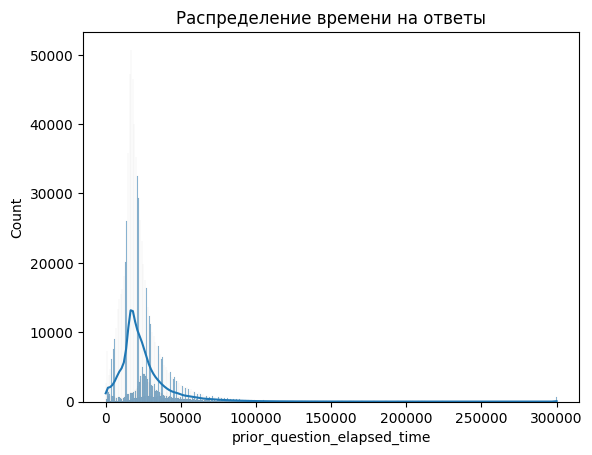

In [18]:
# Построим гистограмму, где по оси x отразим время, затраченное на ответ, по оси y количество ответов на вопросы
sns.histplot(train_df['prior_question_elapsed_time'], kde = True)
plt.title('Распределение времени на ответы')
plt.show()

Из постороенной гистограммы видно, что в среднем время ответа составляет 20-30 секунд

In [19]:
# Рассчитаем среднее арифметическое значение времени на ответ
train_df['prior_question_elapsed_time'].mean()

25302.962692965215

In [20]:
# Выведем отдельно среднее арифметическое значение времени, затраченного на верный и на неверный ответ
train_df.groupby('answered_correctly')['prior_question_elapsed_time'].mean()

,prior_question_elapsed_time
answered_correctly,
-1,NaN
0,25215.579462
1,25349.965658


Вывод: среднее время, затраченное на верный и на неверный ответ, отличается незначительно. Из этого можно сделать выврд, что время, затаченное на ответ не оказало существенного влияния на успеваемость студентов

3. Влияние объяснений на правильность ответа

In [21]:
# Выведем средее количество правильных ответов для случаев, когда студены смотрели объяснения и правильные ответы и когда не смотрели
# Строки с данными по лекциям (content_type_id = 0) не учитываем
explanation_correct = train_df[train_df['content_type_id'] == 0].groupby('prior_question_had_explanation')['answered_correctly'].mean()
display(explanation_correct)

,answered_correctly
prior_question_had_explanation,
False,0.488795
True,0.665913


Вывод: разъяснения положительно влияют на успеваемость студентов. Если учащийся получал разъяснения, то отвечал правильно на вопросы в 67% случаев, иначе только в 49%

4. Зависмость успеваемости от темактики, сложности вопросов

In [22]:
# Объединим данные из файлов train.csv и questions.csv
train_questions_df = pd.merge(train_df[train_df['content_type_id'] == 0], questions_df, left_on = 'content_id', right_on = 'question_id')
train_questions_df.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_id,bundle_id,correct_answer,part,tags
0,0,0,115,5692,0,1,3,1,NaN,NaN,5692,5692,3,5,151
1,1,56943,115,5716,0,2,2,1,37000.0,False,5716,5716,2,5,168
2,2,118363,115,128,0,0,0,1,55000.0,False,128,128,0,1,131 149 92
3,3,131167,115,7860,0,3,0,1,19000.0,False,7860,7860,0,1,131 104 81
4,4,137965,115,7922,0,4,1,1,11000.0,False,7922,7922,1,1,131 149 92


In [23]:
# Анализ по тегам
# Выведем среднее количество верных ответов по тегу или набору тегов
tag_q_correctness = train_questions_df.groupby('tags')['answered_correctly'].mean()
display(tag_q_correctness)

,answered_correctly
tags,
1,0.597663
1 162,0.605299
10 111 92,0.898305
10 164 102,0.786982
10 164 162 29,0.900000
...,...
98 97 21,0.664804
98 97 35 117 122 162,0.682692
98 97 35 146 122,0.691176


In [24]:
# Анализ по разделам теста (part)
# Выведем среднее количество верных ответов в зависимости от раздела теста
part_q_correctness = train_questions_df.groupby('part')['answered_correctly'].mean()
display(part_q_correctness)

,answered_correctly
part,
1,0.735834
2,0.707258
3,0.692096
4,0.620959
5,0.606321
6,0.650695
7,0.645141


Вывод: анализ по тегам и разделам теста показывает, что по различным темам, разделам теста среднее значение верных ответ отличается. На это могут влиять сложность темы и другие факторы, что также отражается на успеваемости студентов

5. Роль лекций и объяснений в обучении

In [25]:
# Создадим копию таблицы из файла train.csv, где заменим -1, NaN и False на 0
train_df_copy = train_df.replace({-1: 0, 'NaN': 0, False: 0})
# Выведем информацию о количестве лекций, которые посетил студент, количестве верных ответов и количестве полученных разъяснений
# Эту информацию выводим в разрезе пользователей
train_lectures_explanations = train_df_copy.groupby('user_id')[['content_type_id', 'answered_correctly', 'prior_question_had_explanation']].sum().reset_index().rename(columns={'content_type_id': 'lectures'})
display(train_lectures_explanations)

,user_id,lectures,answered_correctly,prior_question_had_explanation
0,115,0,32,6
1,124,0,7,0
2,2746,1,11,11
3,5382,3,84,113
4,8623,3,70,96
...,...,...,...,...
3819,20913319,18,251,370
3820,20913864,0,7,10
3821,20938253,11,319,493
3822,20948951,0,31,39


<Axes: xlabel='prior_question_had_explanation', ylabel='answered_correctly'>

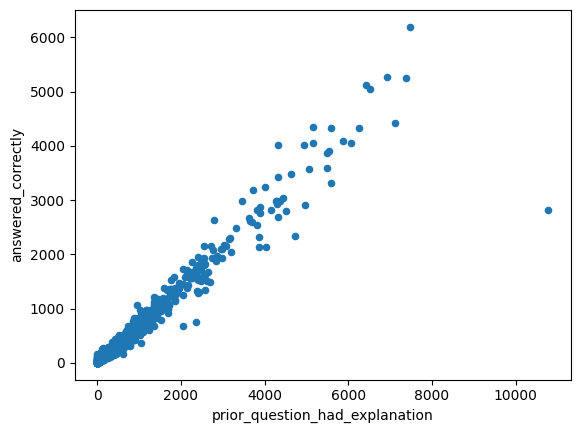

In [26]:
# В продолжение анализа, приведенного в пункте 3, построим график, чтобы выявить зависимость между полученными разъяснениями и количеством верных ответов
train_lectures_explanations.plot(x='prior_question_had_explanation', y='answered_correctly', kind = 'scatter')

Вывод: на графике видим четкую зависимость между количеством полученных разъяснений и количеством верных ответов, что показывает существенное влияние этого фактора на успеваемость студентов

<Axes: xlabel='lectures', ylabel='answered_correctly'>

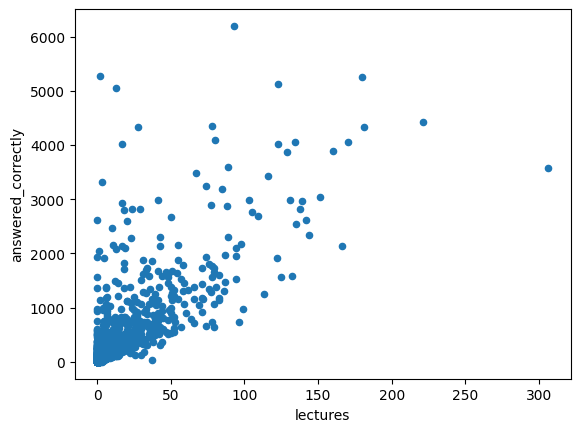

In [27]:
# Построим график, чтобы выявить зависимость между колиеством лекций, которые посетил студент, и количеством верных ответов
train_lectures_explanations.plot(x='lectures', y='answered_correctly', kind = 'scatter')

Вывод: на представленном графике мы также видим, что прослушивание лекций также положительно влияет на успеваемость, хотя зависимость не такая четкая как в случае с разъяснениями. Это может говорить о высом уровне подготовки студентов, который позволяем им успешно проходить тест без лекций, возможно студенты пользуются другими источниками информации кроме лекций на платформе и тп